In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_svmlight_file

In [6]:
# Sparse matrix
data = load_svmlight_file('data_libsvm/binclassv2_libSVM.txt')
X, y = data

In [7]:
# Linear kernel SVM
model = svm.SVC(C = 1, kernel = 'linear')
model.fit(X, y)

SVC(C=1, kernel='linear')

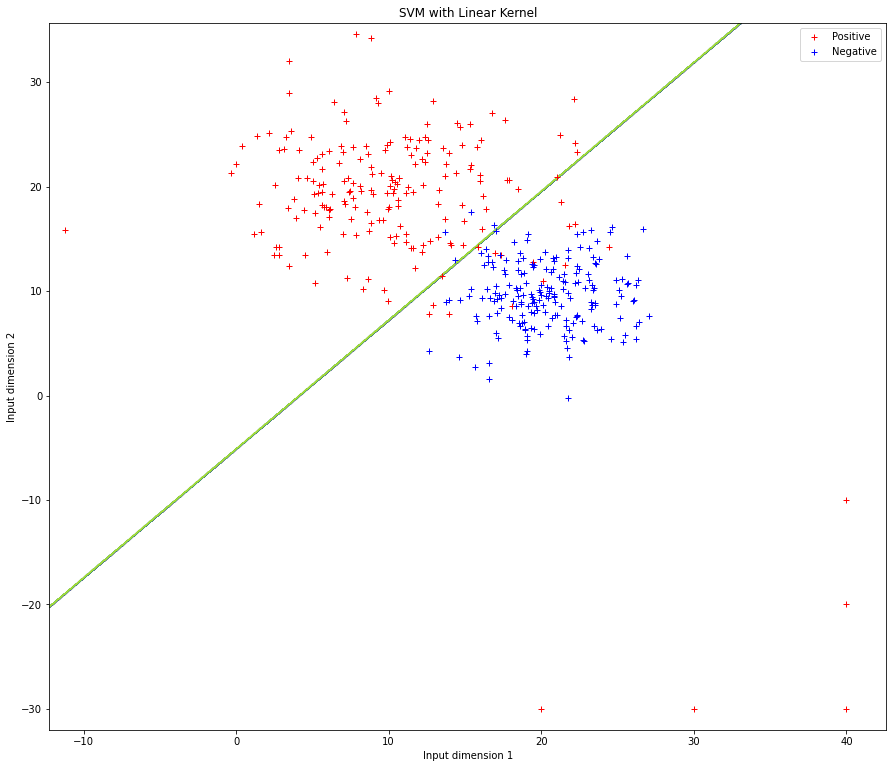

In [8]:
# Initialize the plot
plt.figure(figsize = (15,13))
plt.title('SVM with Linear Kernel')
plt.xlabel('Input dimension 1')
plt.ylabel('Input dimension 2')

# Set equispaced points 
u = np.linspace(np.min(X.todense()[:, 0])-1, np.max(X.todense()[:, 1])+1, 1000);
v = np.linspace(-32, np.max(X.todense()[:, 1])+1, 1000)[:, None]

# Positive class 
plt.plot(X.todense()[y > 0, 0], X.todense()[y > 0, 1], 'r+', label = 'Positive')

# Negative class
plt.plot(X.todense()[y < 0, 0], X.todense()[y < 0, 1], 'b+', label = 'Negative')

# Decision boundary
U, V = np.meshgrid(u,v)
Z = model.predict(np.c_[U.ravel(), V.ravel()])
Z = Z.reshape(U.shape)
plt.contour(U, V, Z)

plt.legend()
plt.savefig('binclassv2 SVM')
plt.show()